# Age caputering using voice
Dataset: https://www.kaggle.com/datasets/ogechukwu/voice?select=BVCvoicereadme.txt <br />
Author: Abdelrahman Lotfy<br />
Linkedin: https://www.linkedin.com/in/abdelrahman-mahmoud-9720221a7/

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d ogechukwu/voice

!unzip /content/voice.zip

Saving kaggle.json to kaggle.json
100% 800M/802M [00:05<00:00, 183MB/s]
100% 802M/802M [00:05<00:00, 144MB/s]
Archive:  /content/voice.zip
  inflating: BVC_Voice_Bio_Public.xlsx  
  inflating: BVCvoicereadme.txt      
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VE1.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VE2.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VE3.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VE4.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VE5.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VV1.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VV2.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VV3.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VV4.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4001_VV5.wav  
  inflating: S_02_voice/S_02/multiple_sentences/S_02_4008_VE1.wav  
  inflating: S_02_voice/S_02/multi

# Preprocessing

In [32]:
import numpy as np
import pandas as pd
import os

import librosa
import librosa.display
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


## Reading audio files

In [4]:
def read_audio_files(directory):
    audio_list = []

    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            audio_list.append(os.path.join(dirname, filename))

    return audio_list

In [5]:
audio_list = read_audio_files('multiple_sentences/multiple_sentences')

In [6]:
audio_list

['multiple_sentences/multiple_sentences/S_01_4078_VV2.wav',
 'multiple_sentences/multiple_sentences/S_01_4897_VV5.wav',
 'multiple_sentences/multiple_sentences/S_01_4355_VV5.wav',
 'multiple_sentences/multiple_sentences/S_01_4616_VE1.wav',
 'multiple_sentences/multiple_sentences/S_01_4157_VE2.wav',
 'multiple_sentences/multiple_sentences/S_01_4494_VV4.wav',
 'multiple_sentences/multiple_sentences/S_01_4726_VV1.wav',
 'multiple_sentences/multiple_sentences/S_01_4347_VE3.wav',
 'multiple_sentences/multiple_sentences/S_01_4949_VV3.wav',
 'multiple_sentences/multiple_sentences/S_01_4823_VE2.wav',
 'multiple_sentences/multiple_sentences/S_01_4627_VE4.wav',
 'multiple_sentences/multiple_sentences/S_01_4613_VV3.wav',
 'multiple_sentences/multiple_sentences/S_01_4271_VV3.wav',
 'multiple_sentences/multiple_sentences/S_01_4504_VE4.wav',
 'multiple_sentences/multiple_sentences/S_01_4870_VV4.wav',
 'multiple_sentences/multiple_sentences/S_01_4468_VV4.wav',
 'multiple_sentences/multiple_sentences/

In [7]:
def extract_number(string):
    parts = string.split('_')
    number = None

    for words in parts:
        if len(words) == 4:
            number = words
            break      
    return number

In [8]:
#pip  install librosa

## Audio Sample

In [9]:
ipd.Audio(audio_list[0]) #Sample of the audio files

### Note that for every audio ID there're 10 audi files, the first 5 are in English the other 5 are other languages <br />
-VE means voice in English <br />
-VV Means voice is in african language

## Feature extraction

In [10]:
def feature_extraction(file_path):
    #load audio file
    x, sample_rate = librosa.load(file_path, res_type = 'kaiser_fast')
    #extract features from the audio
    
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr = sample_rate, n_mfcc = 16).T, axis = 0) #Mean of the frames
    
    return mfcc

In [11]:
pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.9 MB/s eta 0:00:00


In [12]:
#features extraction from every audio
features = {}

for audio in audio_list:
    key = extract_number(audio)
    if key in features:
        features[key].append(feature_extraction(audio))
    else:
        features[key] = [feature_extraction(audio)]

In [13]:
features

{'4078': [array([-3.0530371e+02,  1.4088792e+02,  3.3973541e+01,  2.3591599e+01,
          1.9199202e+00,  1.4872358e+01, -1.5579657e+01,  4.3877921e+00,
         -5.4896736e+00, -1.8753654e+00,  2.1758270e-01, -6.9081879e-01,
         -7.0976214e+00,  1.2206973e+01, -8.8133898e+00,  1.1088940e+01],
        dtype=float32),
  array([-305.0752   ,  120.26826  ,   38.30583  ,   37.849106 ,
           15.225519 ,   13.08342  ,  -16.450949 ,    5.306384 ,
           -4.189838 ,   -7.6921864,   -1.2036396,    1.3449403,
           -3.7456448,   12.26408  ,  -10.594328 ,    8.196794 ],
        dtype=float32),
  array([-252.6892   ,  147.71666  ,   21.432001 ,   23.88198  ,
           10.592534 ,   15.027462 ,  -11.2003765,   -4.3267555,
           -6.5124345,   -3.0425646,   -3.9321024,    1.0956166,
           -2.8363755,    8.134708 ,   -5.5352316,    4.5491524],
        dtype=float32),
  array([-315.27628   ,  121.47441   ,   38.199     ,   30.161083  ,
            2.4423785 ,   17.893593 

In [14]:
data = []

# Iterate over the dictionary items
for key, values in features.items():
    # Iterate over the list of feature values for each key
    for value in values:
        # Append a tuple containing the key and feature value to the data list
        data.append((key, value))

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['Key', 'Feature']) 

In [15]:
df

,Key,Feature
0,4078,"[-305.3037, 140.88792, 33.97354, 23.591599, 1...."
1,4078,"[-305.0752, 120.26826, 38.30583, 37.849106, 15..."
2,4078,"[-252.6892, 147.71666, 21.432001, 23.88198, 10..."
3,4078,"[-315.27628, 121.47441, 38.199, 30.161083, 2.4..."
4,4078,"[-290.5797, 110.32589, 43.70958, 34.761948, 8...."
...,...,...
1773,4274,"[-309.20383, 113.46269, 14.947423, 39.354668, ..."
1774,4274,"[-279.13626, 130.90756, 9.774922, 41.87176, 0...."
1775,4274,"[-253.99677, 102.3773, 19.069094, 52.40213, -6..."
1776,4274,"[-290.76727, 151.29477, 17.278227, 36.105507, ..."


In [67]:
dff = pd.read_csv('BVC_Voice_Bio_Public(1).csv')
dff

,New_ID,Sex,Age,Ethnicity,Unnamed: 4,Unnamed: 5
0,4001,'Male',19,'Igbo',NaN,336
1,4002,'Male',23,'Igbo',NaN,190
2,4003,'Female',18,'Ikwerre',NaN,NaN
3,4004,'Male',23,'Annang',NaN,% Actual subjects = 526
4,4005,'Female',17,'Igbo',NaN,% Male subjects = 336
...,...,...,...,...,...,...
555,4993,'Male',18,'Igede',NaN,NaN
556,4994,'Male',17,'Okirika',NaN,NaN
557,4995,'Male',22,'Igbo',NaN,NaN
558,4998,'Female',23,'Igbo',NaN,NaN


In [68]:
df = df.rename(columns={'Key': 'New_ID'})

In [69]:
df

,New_ID,Feature
0,4078,"[-305.3037, 140.88792, 33.97354, 23.591599, 1...."
1,4078,"[-305.0752, 120.26826, 38.30583, 37.849106, 15..."
2,4078,"[-252.6892, 147.71666, 21.432001, 23.88198, 10..."
3,4078,"[-315.27628, 121.47441, 38.199, 30.161083, 2.4..."
4,4078,"[-290.5797, 110.32589, 43.70958, 34.761948, 8...."
...,...,...
1773,4274,"[-309.20383, 113.46269, 14.947423, 39.354668, ..."
1774,4274,"[-279.13626, 130.90756, 9.774922, 41.87176, 0...."
1775,4274,"[-253.99677, 102.3773, 19.069094, 52.40213, -6..."
1776,4274,"[-290.76727, 151.29477, 17.278227, 36.105507, ..."


In [70]:
df['New_ID'] = df['New_ID'].astype(int)

In [71]:
merged_df = pd.merge(df, dff, on='New_ID')
merged_df

,New_ID,Feature,Sex,Age,Ethnicity,Unnamed: 4,Unnamed: 5
0,4078,"[-305.3037, 140.88792, 33.97354, 23.591599, 1....",'Male',26,'Igbo',NaN,NaN
1,4078,"[-305.0752, 120.26826, 38.30583, 37.849106, 15...",'Male',26,'Igbo',NaN,NaN
2,4078,"[-252.6892, 147.71666, 21.432001, 23.88198, 10...",'Male',26,'Igbo',NaN,NaN
3,4078,"[-315.27628, 121.47441, 38.199, 30.161083, 2.4...",'Male',26,'Igbo',NaN,NaN
4,4078,"[-290.5797, 110.32589, 43.70958, 34.761948, 8....",'Male',26,'Igbo',NaN,NaN
...,...,...,...,...,...,...,...
1773,4274,"[-309.20383, 113.46269, 14.947423, 39.354668, ...",'Male',23,'Igbo',NaN,NaN
1774,4274,"[-279.13626, 130.90756, 9.774922, 41.87176, 0....",'Male',23,'Igbo',NaN,NaN
1775,4274,"[-253.99677, 102.3773, 19.069094, 52.40213, -6...",'Male',23,'Igbo',NaN,NaN
1776,4274,"[-290.76727, 151.29477, 17.278227, 36.105507, ...",'Male',23,'Igbo',NaN,NaN


In [72]:
cols_to_drop = ['Sex', 'Ethnicity', 'Unnamed: 4', 'Unnamed: 5']
merged_df.drop(cols_to_drop, inplace = True, axis = 1)


In [73]:
merged_df

,New_ID,Feature,Age
0,4078,"[-305.3037, 140.88792, 33.97354, 23.591599, 1....",26
1,4078,"[-305.0752, 120.26826, 38.30583, 37.849106, 15...",26
2,4078,"[-252.6892, 147.71666, 21.432001, 23.88198, 10...",26
3,4078,"[-315.27628, 121.47441, 38.199, 30.161083, 2.4...",26
4,4078,"[-290.5797, 110.32589, 43.70958, 34.761948, 8....",26
...,...,...,...
1773,4274,"[-309.20383, 113.46269, 14.947423, 39.354668, ...",23
1774,4274,"[-279.13626, 130.90756, 9.774922, 41.87176, 0....",23
1775,4274,"[-253.99677, 102.3773, 19.069094, 52.40213, -6...",23
1776,4274,"[-290.76727, 151.29477, 17.278227, 36.105507, ...",23


In [74]:
cdf = pd.concat([merged_df,pd.DataFrame(df['Feature'].values.tolist())],axis=1)

In [75]:
cdf

,New_ID,Feature,Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4078,"[-305.3037, 140.88792, 33.97354, 23.591599, 1....",26,-305.303711,140.887924,33.973541,23.591599,1.919920,14.872358,-15.579657,4.387792,-5.489674,-1.875365,0.217583,-0.690819,-7.097621,12.206973,-8.813390,11.088940
1,4078,"[-305.0752, 120.26826, 38.30583, 37.849106, 15...",26,-305.075195,120.268257,38.305828,37.849106,15.225519,13.083420,-16.450949,5.306384,-4.189838,-7.692186,-1.203640,1.344940,-3.745645,12.264080,-10.594328,8.196794
2,4078,"[-252.6892, 147.71666, 21.432001, 23.88198, 10...",26,-252.689194,147.716660,21.432001,23.881981,10.592534,15.027462,-11.200377,-4.326756,-6.512434,-3.042565,-3.932102,1.095617,-2.836375,8.134708,-5.535232,4.549152
3,4078,"[-315.27628, 121.47441, 38.199, 30.161083, 2.4...",26,-315.276276,121.474411,38.199001,30.161083,2.442379,17.893593,-16.616423,0.757277,-3.420741,-1.846843,-0.790597,4.447734,-8.016854,18.472733,-11.354390,10.480078
4,4078,"[-290.5797, 110.32589, 43.70958, 34.761948, 8....",26,-290.579712,110.325890,43.709579,34.761948,8.842999,19.114534,-19.977991,-0.535417,-1.047600,-3.018776,-0.334707,4.278553,-12.138700,12.071370,-10.914178,11.064630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,4274,"[-309.20383, 113.46269, 14.947423, 39.354668, ...",23,-309.203827,113.462692,14.947423,39.354668,-4.150391,1.735364,-4.115228,12.125525,-16.475716,12.779543,-1.320046,4.096879,-4.602494,5.132974,-4.638703,2.026476
1774,4274,"[-279.13626, 130.90756, 9.774922, 41.87176, 0....",23,-279.136261,130.907562,9.774922,41.871761,0.519218,8.152531,1.167242,6.068680,-17.445080,7.523778,-7.207511,8.958321,-7.514722,5.073089,-3.831267,4.310614
1775,4274,"[-253.99677, 102.3773, 19.069094, 52.40213, -6...",23,-253.996765,102.377296,19.069094,52.402130,-6.767591,15.834760,-14.553880,-2.305120,-10.459931,5.925744,-8.304095,4.470030,-6.223951,8.720765,-1.118196,1.074418
1776,4274,"[-290.76727, 151.29477, 17.278227, 36.105507, ...",23,-290.767273,151.294769,17.278227,36.105507,-3.613165,-4.306687,3.736319,11.244623,-10.569738,5.968835,-1.592952,3.209803,-7.744844,-2.362779,-3.550424,1.110851


In [76]:
cdf.drop('Feature', inplace = True, axis = 1)


In [77]:
cdf.drop('New_ID', inplace = True, axis = 1)

In [78]:
cdf

,Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,26,-305.303711,140.887924,33.973541,23.591599,1.919920,14.872358,-15.579657,4.387792,-5.489674,-1.875365,0.217583,-0.690819,-7.097621,12.206973,-8.813390,11.088940
1,26,-305.075195,120.268257,38.305828,37.849106,15.225519,13.083420,-16.450949,5.306384,-4.189838,-7.692186,-1.203640,1.344940,-3.745645,12.264080,-10.594328,8.196794
2,26,-252.689194,147.716660,21.432001,23.881981,10.592534,15.027462,-11.200377,-4.326756,-6.512434,-3.042565,-3.932102,1.095617,-2.836375,8.134708,-5.535232,4.549152
3,26,-315.276276,121.474411,38.199001,30.161083,2.442379,17.893593,-16.616423,0.757277,-3.420741,-1.846843,-0.790597,4.447734,-8.016854,18.472733,-11.354390,10.480078
4,26,-290.579712,110.325890,43.709579,34.761948,8.842999,19.114534,-19.977991,-0.535417,-1.047600,-3.018776,-0.334707,4.278553,-12.138700,12.071370,-10.914178,11.064630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,23,-309.203827,113.462692,14.947423,39.354668,-4.150391,1.735364,-4.115228,12.125525,-16.475716,12.779543,-1.320046,4.096879,-4.602494,5.132974,-4.638703,2.026476
1774,23,-279.136261,130.907562,9.774922,41.871761,0.519218,8.152531,1.167242,6.068680,-17.445080,7.523778,-7.207511,8.958321,-7.514722,5.073089,-3.831267,4.310614
1775,23,-253.996765,102.377296,19.069094,52.402130,-6.767591,15.834760,-14.553880,-2.305120,-10.459931,5.925744,-8.304095,4.470030,-6.223951,8.720765,-1.118196,1.074418
1776,23,-290.767273,151.294769,17.278227,36.105507,-3.613165,-4.306687,3.736319,11.244623,-10.569738,5.968835,-1.592952,3.209803,-7.744844,-2.362779,-3.550424,1.110851


## Data preparation before spliting

In [79]:
X = cdf
Y = cdf['Age']


In [80]:
X = X.drop('Age', axis = 1)

In [81]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True, test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1422, 16), (1422,), (356, 16), (356,))

## Data Augmenation <br/>
### Adding data with noise, stretched waves, and pitch shifting

In [82]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # x - mean/std
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1422, 16), (1422,), (356, 16), (356,))

### Reshaping the data for the model input

In [83]:
#making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1422, 16, 1), (1422,), (356, 16, 1), (356,))

In [84]:
x_train.shape[1]

16

## CNN model construction

In [85]:
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear')) # Update the number of units to 1

In [86]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 16, 256)           1536      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 8, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 8, 256)            327936    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 4, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 4, 64)             81984     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 2, 64)           

## Model Training

In [87]:
rlrp = ReduceLROnPlateau(monitor='loss', min_lr=0.0000001)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
23/23 [==============================] - 3s 93ms/step - loss: 158.0742 - val_loss: 58.7119 - lr: 0.0010
Epoch 2/50
23/23 [==============================] - 2s 99ms/step - loss: 51.8823 - val_loss: 27.6701 - lr: 0.0010
Epoch 3/50
23/23 [==============================] - 3s 119ms/step - loss: 40.1230 - val_loss: 24.1231 - lr: 0.0010
Epoch 4/50
23/23 [==============================] - 2s 83ms/step - loss: 34.0465 - val_loss: 20.5026 - lr: 0.0010
Epoch 5/50
23/23 [==============================] - 2s 83ms/step - loss: 32.1003 - val_loss: 18.1218 - lr: 0.0010
Epoch 6/50
23/23 [==============================] - 2s 83ms/step - loss: 31.2580 - val_loss: 16.6380 - lr: 0.0010
Epoch 7/50
23/23 [==============================] - 2s 84ms/step - loss: 26.5783 - val_loss: 15.3591 - lr: 0.0010
Epoch 8/50
23/23 [==============================] - 2s 88ms/step - loss: 24.4913 - val_loss: 12.9752 - lr: 0.0010
Epoch 9/50
23/23 [==============================] - 3s 135ms/step - loss: 25.5357 - va

# Model performance and score

In [88]:
y_predict = model.predict(x_test)

12/12 [==============================] - 0s 7ms/step


In [89]:
def calculate_mse(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("Number of predicted values does not match number of actual values.")
    
    squared_errors = [(p - a) ** 2 for p, a in zip(predicted_values, actual_values)]
    mse = sum(squared_errors) / len(predicted_values)
    
    return mse


In [90]:
mse = calculate_mse(y_predict, y_test)

In [91]:
mse[0]

7.761015

In [92]:

score = r2_score(y_test, y_predict)
print(score)

0.1283811871990177


In [93]:

mse = mean_squared_error(y_test, y_predict)

print("Mean Squared Error:", mse)

Mean Squared Error: 7.761015337201652


12/12 [==============================] - 0s 7ms/step - loss: 7.7610
Accuracy of our model on test data :  776.1014938354492 %


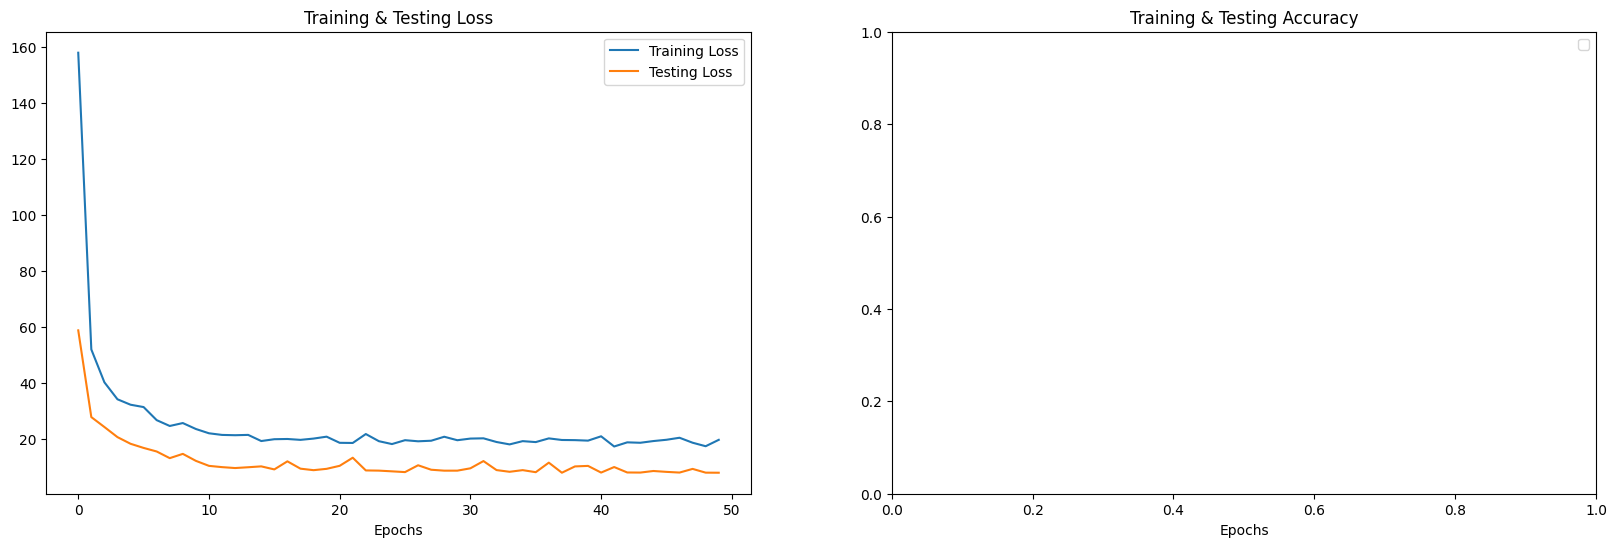

In [94]:


print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)

train_loss = history.history['loss']

test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")



ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()